#Speech Processing Lab - Week 6

Name: S U Swakath 

Roll number: 180020036

Google Colab Link : https://colab.research.google.com/drive/1iGkdszxCK09qrH61t1GMBUiShTCz9y91?usp=sharing

**Aim**

* To understand the need for short term processing of speech.
* To compute short term energy and study its significance.
* To compute short term zero crossing rate and study its significance.
* To compute short term autocorrelation and study its significance.


**Theory**

Speech is produced from a time varying vocal tract system with time varying excitation. As a result the speech signal is non-stationary in nature. Most of the signal processing tools studied in signals and systems and signal processing assume time invariant system  and time invariant excitation, i.e. stationary signal. Hence these tools are not directly applicable for speech processing. This is because, use of such tools directly on speech violates their underlying assumption.

An engineering solution proposed for processing speech was to make use of existing signal processing tools in a modified fashion. To be more specific, the tools can still assume the signal under processing to be stationary. Speech signal may be stationary when it is viewed in blocks  of 10-30 msec. Hence to process speech by different signal processing tools, it is viewed in terms of 10-30 msec. Such a processing is termed as Short Term Processing (STP).

**Short Term Energy**

The energy associated with speech is time varying in nature. Hence the interest for any automatic processing of speech is to know how the energy is varying with time and to be more specific, energy associated with short term region of speech.

$E=\sum_{i=0}^{N-1} {s_i}^2$

This relation will give total energy present in the frame of speech from $n=0$ to $n=N-1$. To represent more specifically, only one frame of speech we use the relation

$s_w(n) = s(m)w(n-m)$

where $w(n)$ represent the windowing function of finite duration. There are several windowing functions present in the signal processing literature. The mostly used ones include rectangular, hanning and hamming.

**Short Term Zero Crossing Rate**

Zero Crossing Rate gives information about the number of zero-crossings present in a given signal. Intuitively, if the number of zero crossings are more in a given signal, then the signal is changing rapidly and accordingly the signal may contain  high frequency information. On the similar lines, if the number of zero crossing are less, hence the signal is changing slowly and accordingly the signal may contain low frequency information. Thus ZCR gives an indirect information about the frequency content of the signal.

$z(n) = \frac{1}{2N} \sum_{m=0}^{N-1}s(m)w(n-m)$

**Short Term Autocorrelation**

Autocorrelation refers to the case of having only one sequence for correlation. In autocorrelation, the interest is in observing how similar the signal characteristics with respect to time. This is achived by providing different time lag for the sequence and computing with the given sequence as reference.

The autocorrelation is a very useful tool in case of speech processing. However due to the non-stationary nature of speech, a short term version of the autocorrelation is needed.

$r_{ss}(n, k) = \sum_{m=-\infty}^{\infty}s(m)w(n-m)s(m+k)w(n-k+m)$

#Problem A
Short term energy(STE) :

1. Compute and plot STE (as a function of frame index) using frame size as 20ms and  frameshift as 10ms.
2. Demonstrate and explain the effect of the window size on STE by taking window size of 20ms, 30ms, 50ms, 100ms. Also comment on which frame size is preferred.


In [ ]:
# Changing directory
%cd /content/gdrive/MyDrive/Sem6/Speech Lab/Week6
!ls

/content/gdrive/MyDrive/Sem6/Speech Lab/Week6
Lab6.ipynb  week6audio.wav


In [ ]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import soundfile as sf

#Functions 

#Function to compute autocorrelation 
def autocorr(sound):
  len = sound.shape[0]
  shift = np.arange(0, len, 1)
  autocorr = np.zeros((shift.shape[0],))

  for curr_shift in shift:
    autocorr[curr_shift] = np.dot(sound[0:len-curr_shift].T,sound[curr_shift:])
  return shift,autocorr

#Function to compute ZCR of a frame
def ZCR(frame,frameSize):
  zero_crosses = np.nonzero(np.diff(frame > 0))[0]
  val = zero_crosses.size
  #val = val/frameSize
  return val

#Function to compute Short time energy of a frame
def shortTimeEnergy(frame,frameSize):
  energy = np.sum(np.square(frame))
  energy = energy/frameSize
  return energy

#Function to plot ZCR and Short Term Energy of a sound
def shortTimePlot(sound,frameSize,frameShift):
  curSamples = sound.size
  soundZCR = []; #Final ZCR array
  soundEnergy = []; #Final Energy array
  i = 0;
  while (curSamples > 0):
    if (curSamples>=frameSize):
      curWindow = sound[int (i*frameShift):int (i*frameShift + frameSize)]
    else:
      curWindow = sound[int (i*frameShift): sound.size]
    curZCR = ZCR(curWindow,frameSize)
    curEng = shortTimeEnergy(curWindow,frameSize)
    soundZCR.append(curZCR)
    soundEnergy.append(curEng)
    curSamples = curSamples - frameShift
    i = i+1
  soundZCR = np.array(soundZCR)
  soundEnergy = np.array(soundEnergy)
  return soundZCR,soundEnergy  

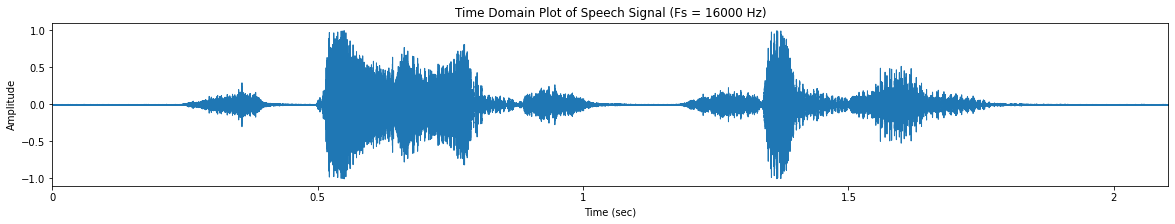

In [ ]:
# Loading the audio into colab. Fs = 16kHz
audio, fs = librosa.load("week6audio.wav", sr = 16000)

# Plotting time domain plot of the audio
plt.figure(figsize=(20,3))
librosa.display.waveplot(audio, sr=fs);
plt.title("Time Domain Plot of Speech Signal (Fs = " +str(fs)+" Hz)")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

# Extracting different categories of sound in the speech
# The time stamp for each sound component was extracted from wavesurfer and they
# are as follows:
# /s/  - 0.236 s to 0.387 s
# /ee/ - 0.591 s to 0.756 s
s = audio[int(0.236*fs):int(0.387*fs)]
ee = audio[int(0.591*fs):int(0.756*fs)]

sounds = [s,ee]
soundName = ['s','ee']

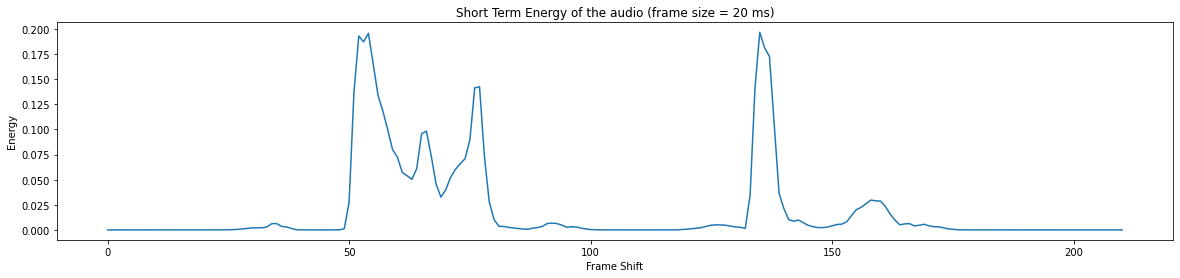

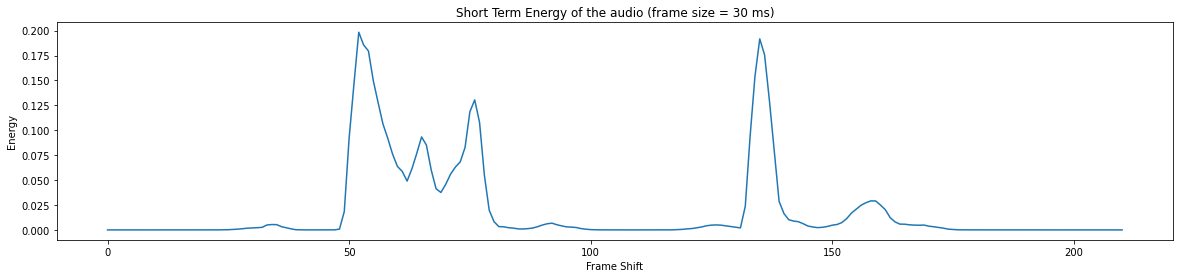

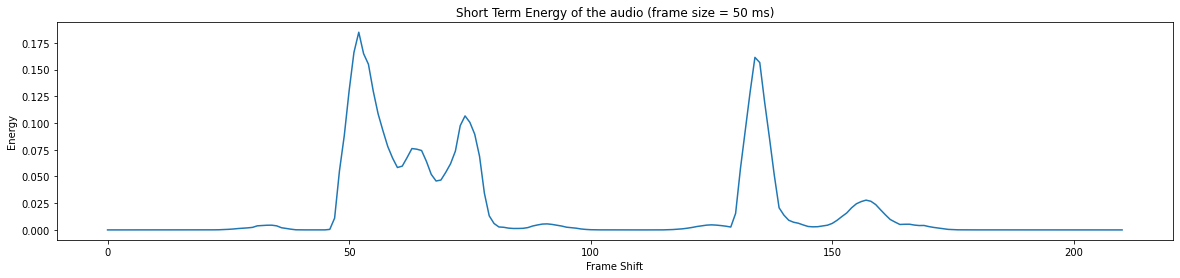

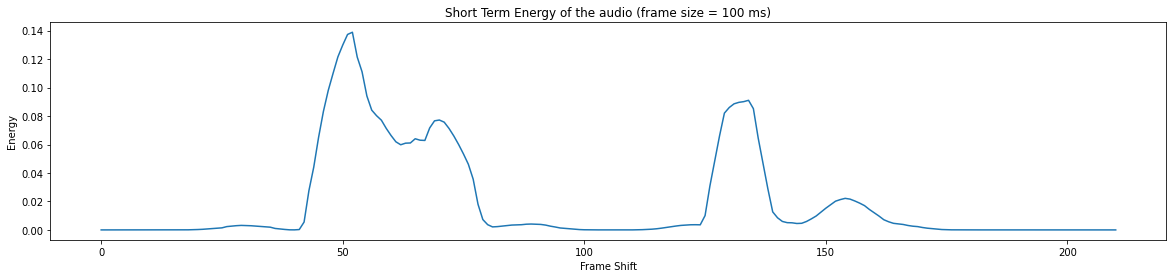

In [ ]:
# Computing Short Term Energy for the audio for different frameSize

frameShift = 0.010*fs
windowSize = [0.020,0.030,0.050,0.100]
for timeWidth in windowSize:
  frameSize = timeWidth*fs
  
  # Computing Short Term Energy for the audio
  z,e = shortTimePlot(audio,frameSize,frameShift)

  # Plotting Short Term energy 
  plt.figure(figsize=(20,4))
  plt.title("Short Term Energy of the audio (frame size = " + str(int (1000*timeWidth))+ " ms)")
  plt.plot(e)
  plt.xlabel("Frame Shift")
  plt.ylabel("Energy")
  plt.show()

**Observation**

1. As the window size increases, we average out longer duration of audio to get the short term energy.
2. The frame size of 20 ms should be preferred as it is not too long so as to violate the quasi-stationarity assumption.

#Problem B
Short term Zero Crossing Rate(ST-ZCR) : 
1. Compute and plot ST-ZCR for speech signal using frame size as 20ms and  frameshift as 10ms.
2. Demonstrate and explain the effect of the window on ST-ZCR by taking window size of 20ms, 30ms, 50ms, 100ms. Also comment on which frame size is preferred.


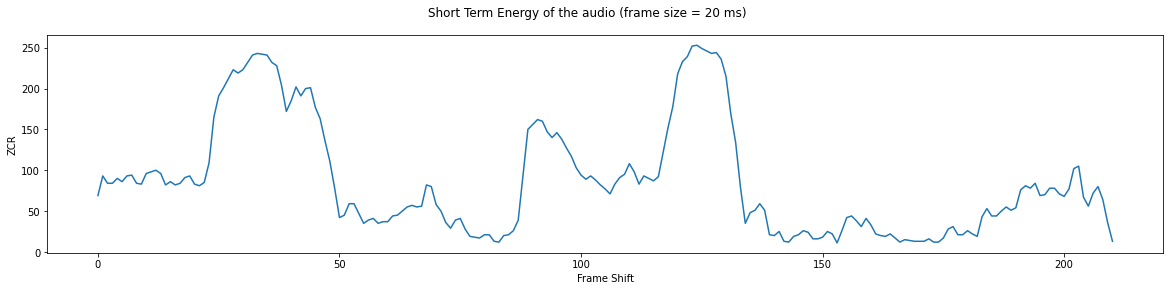

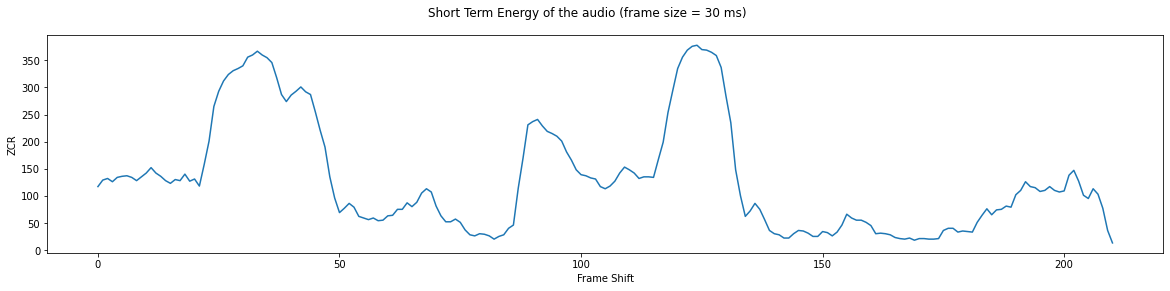

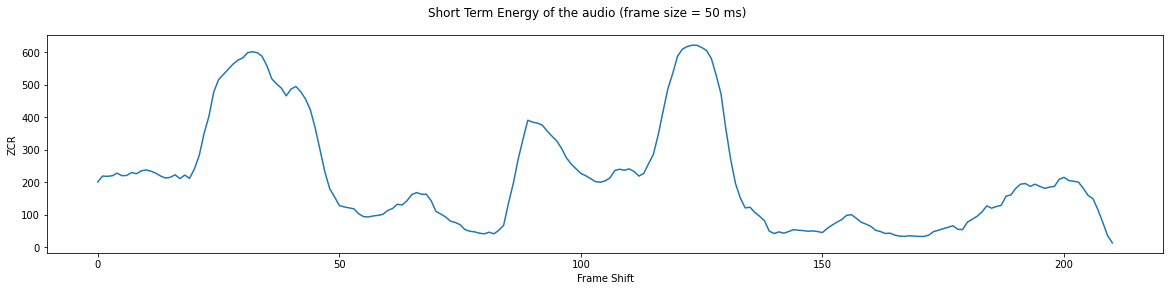

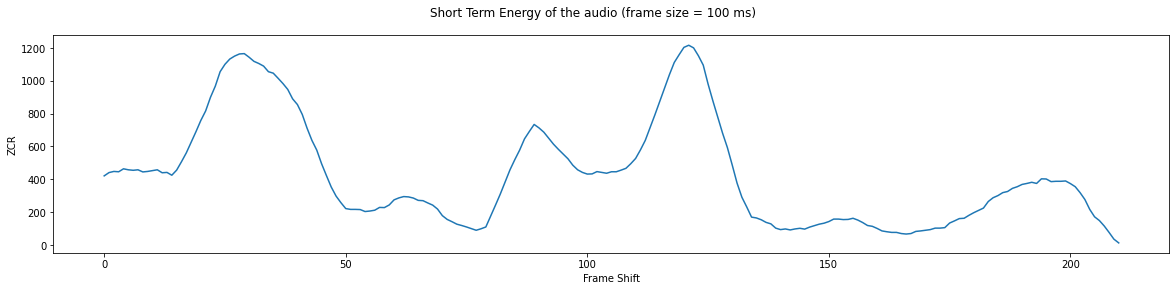

In [ ]:
# Computing Short Term Zero Crossing Rate for the audio for different frameSize

frameShift = 0.010*fs
windowSize = [0.020,0.030,0.050,0.100]
for timeWidth in windowSize:
  frameSize = timeWidth*fs
  
  # Computing ST-ZCR for the audio
  z,e = shortTimePlot(audio,frameSize,frameShift)

  # Plotting ST-ZCR 
  plt.figure(figsize=(20,4))
  plt.suptitle("Short Term Energy of the audio (frame size = " + str(int (1000*timeWidth))+ " ms)")
  plt.plot(z)
  plt.xlabel("Frame Shift")
  plt.ylabel("ZCR")
  plt.show()

**Observations**

1. When we take smaller frame size, the regions with high and low ZCR are more defined.
2. Frame size of 20 ms should be preferred to maintain the assumption of qualsi-stationarity.

#Problem C

Short term Autocorrelation:
Do each of the following for one speech frame at the centre of the vowel, and another speech frame at the centre of  the consonant “s”.

1. Compute and plot short term Autocorrelation function (as a function of delay index) for a 20ms long speech frame.
2. Demonstrate and explain the effect of the window on Short term Autocorrelation by taking window size of 10ms, 20ms, 50ms, 100ms. Also comment on which frame size is preferred.
3. Demonstrate and explain the effect of the window shape on Short term Autocorrelation by taking the ‘rectangular’, ‘Hamming’ and ‘Hanning’ window. Take frame size as the most preferred frame size computed in (b). Also comment on which window is preferred.

In [ ]:
# Extracting different frames for the sound /ee/ and /s/
sFrames= []
eeFrames = []
sMid = int (len(s)/2)
eeMid = int (len(ee)/2)
windowSize = [0.010,0.020,0.050,0.100]
for curLength in windowSize:
  alpha = (int (fs*curLength))/2;
  sFrames.append(s[int (sMid-alpha):int (sMid+alpha)])
  eeFrames.append(ee[int (eeMid-alpha):int (eeMid+alpha)])

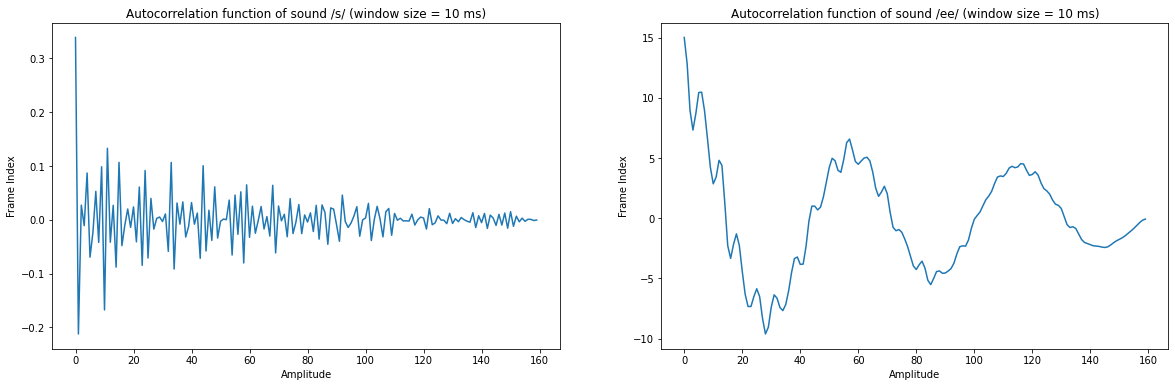

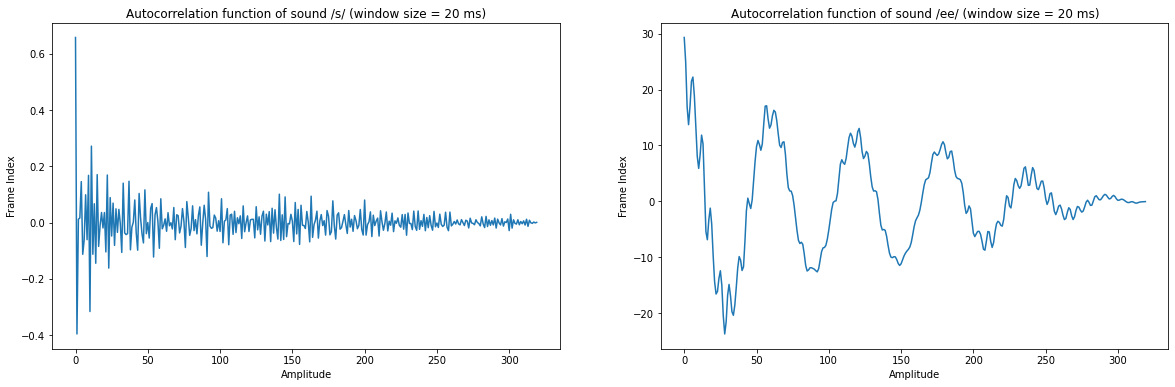

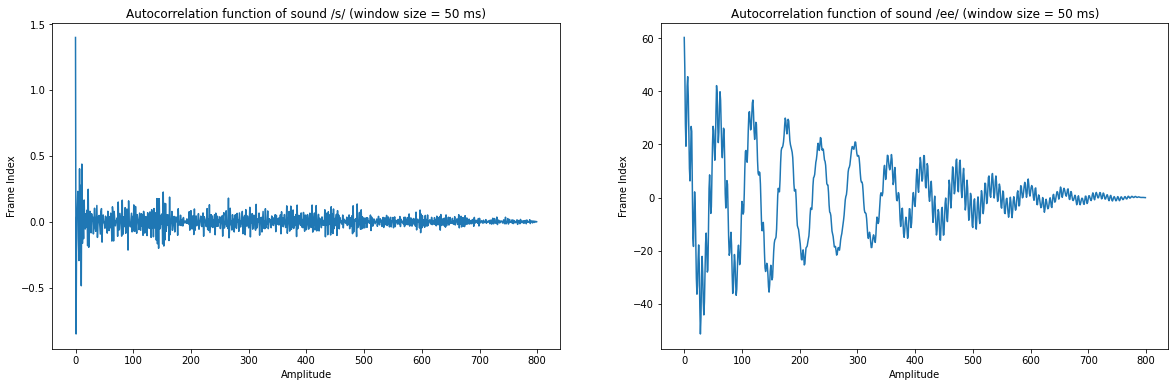

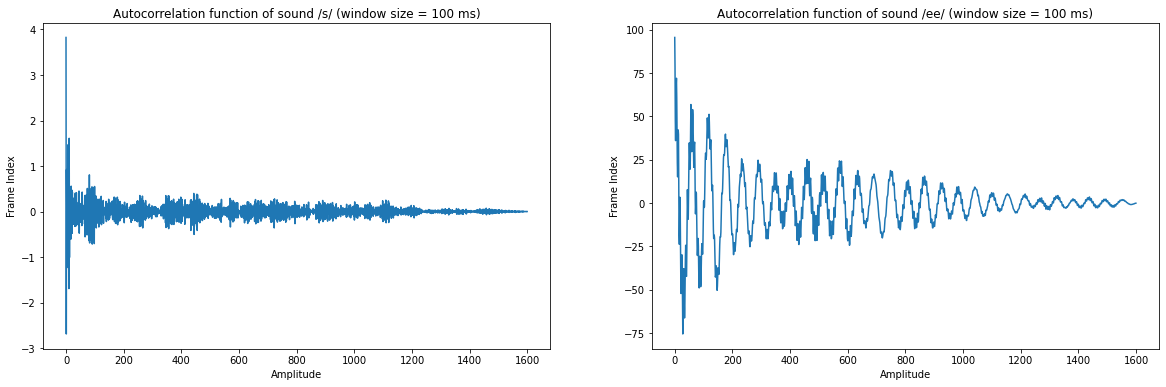

In [ ]:
# Computing and plotting autocorrelation function for different the frames of the sounds /ee/ and /s/
i = 0
while i<4:
  sShift,sAutoCorr = autocorr(sFrames[i])
  eeShift,eeAutoCorr = autocorr(eeFrames[i])
  plt.figure(figsize=(20,6))
  plt.subplot(1,2,1)
  plt.plot(sShift,sAutoCorr)
  plt.xlabel("Amplitude")
  plt.ylabel("Frame Index")
  plt.title("Autocorrelation function of sound /s/ (window size = " + str (int (windowSize[i]*1000)) +" ms)")
  plt.subplot(1,2,2)
  plt.plot(eeShift,eeAutoCorr)
  plt.xlabel("Amplitude")
  plt.ylabel("Frame Index")
  plt.title("Autocorrelation function of sound /ee/ (window size = " + str (int (windowSize[i]*1000)) +" ms)")
  plt.show()
  i = i+1

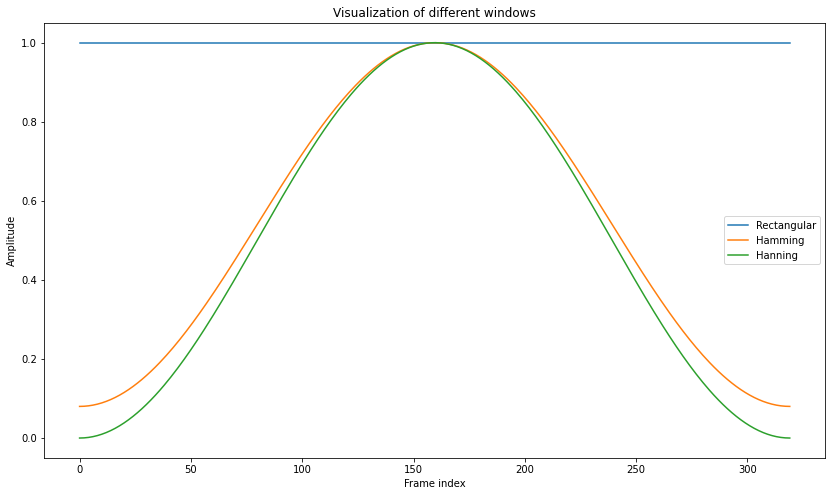

In [ ]:
bestWindowLen = 0.020
ret = np.ones((int (fs*bestWindowLen)))
ham = np.hamming((int (fs*bestWindowLen)))
han = np.hanning((int (fs*bestWindowLen)))

plt.figure(figsize = (14,8))
plt.title("Visualization of different windows")
plt.plot(ret)
plt.plot(ham)
plt.plot(han)
plt.legend(["Rectangular", "Hamming", "Hanning"])
plt.xlabel("Frame index")
plt.ylabel("Amplitude")
plt.show()

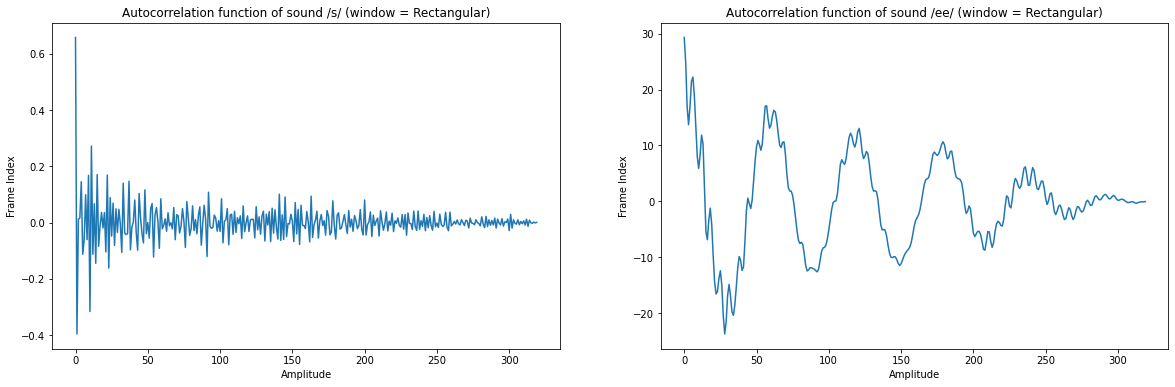

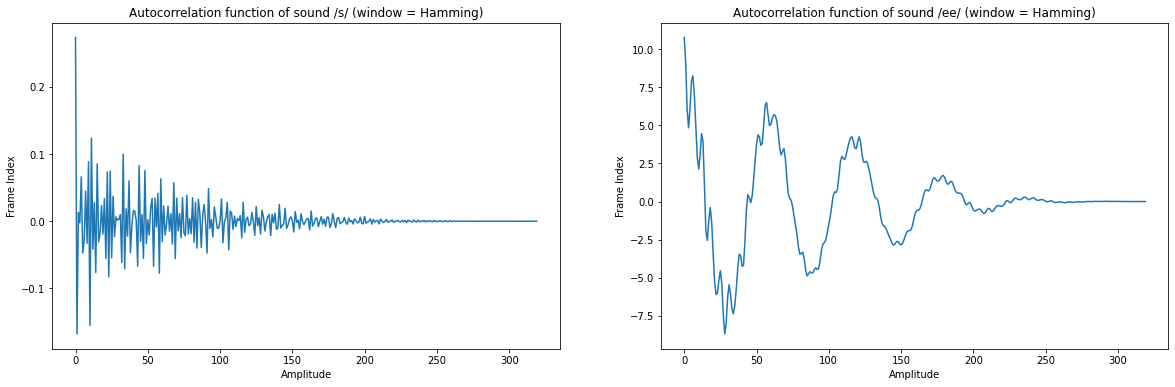

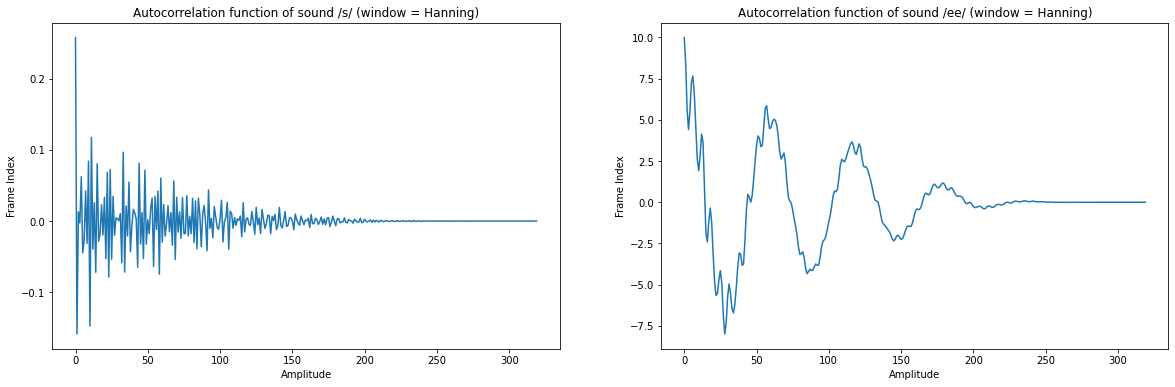

In [ ]:
# Different windowed frame of sound /s/ and /ee/
windows = [ret,ham,han]
winName = ["Rectangular", "Hamming", "Hanning"]
sWin = []
eeWin = []
for curWindow in windows:
  sWin.append(np.multiply(sFrames[1],curWindow))
  eeWin.append(np.multiply(eeFrames[1],curWindow))
i = 0
while i<3:
  sShift,sAutoCorr = autocorr(sWin[i])
  eeShift,eeAutoCorr = autocorr(eeWin[i])
  plt.figure(figsize=(20,6))
  plt.subplot(1,2,1)
  plt.plot(sShift,sAutoCorr)
  plt.xlabel("Amplitude")
  plt.ylabel("Frame Index")
  plt.title("Autocorrelation function of sound /s/ (window = "+ winName[i]+")")
  plt.subplot(1,2,2)
  plt.plot(eeShift,eeAutoCorr)
  plt.xlabel("Amplitude")
  plt.ylabel("Frame Index")
  plt.title("Autocorrelation function of sound /ee/ (window = "+ winName[i]+")")
  plt.show()
  i = i+1

**Observation**
1. When we take longer frame size for autocorrelation, we get more periods (if the signal is periodic). This may not be good for precise measurement of pitch period.
2. We should prefer the frame size of 20 ms as it is not too long and not too short. The quasi-stationarity assumption is followed and there is enough data to capture pitch period in general.
3. The Hamming and Hanning windows suppress the ends of the frame. As we are generally interested only in the first major peak in the autocorrelation plot, it is good to use a Hamming or a Hanning window.
4. Both Hamming and Hanning windows have a similar structure. Hanning window suppresses the ends more as compared to Hamming window.

#References and Tools

1. For theory concepts :- https://vlab.amrita.edu/index.php?sub=59&brch=164&sim=857&cnt=1650
2. Wavesurfer:- https://sourceforge.net/projects/wavesurfer/